In [2]:
%load_ext autoreload
%autoreload 2

import ncem as nc
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import squidpy as sq
import pandas as pd

sc.settings.set_figure_params(dpi=80)

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'ncem'

In [2]:
print(f"ncem=={nc.__version__}")

ncem==0.1.5


In [3]:
from ncem.interpretation import InterpreterDeconvolution
from ncem.train import TrainModelLinearDeconvolution
from ncem.data import get_data_custom, customLoaderDeconvolution

In [4]:
adata = sc.read('/home/jovyan/brain/kidney/results/003_UUO_SH045/cell2location_map/deconvolution_result.h5ad')
adata

AnnData object with n_obs × n_vars = 13430 × 14256
    obs: 'index', 'target_cell'
    uns: 'node_type_names', 'spatial'
    obsm: 'node_types', 'proportions', 'spatial'

In [5]:
random_library_id = np.random.randint(2, size=adata.shape[0])
adata.obs['library_id'] = pd.Categorical([f"image_{i}" for i in random_library_id])

In [6]:
ncem_ip = InterpreterDeconvolution()

In [7]:
ncem_ip.data = customLoaderDeconvolution(
    adata=adata, patient=None, library_id='library_id', radius=None
)

Loading data from raw files
registering celldata
collecting image-wise celldata
adding graph-level covariates


100%|██████████| 2/2 [00:00<00:00, 11.04it/s]

Loaded 2 images with complete data from 1 patients over 13430 cells with 14256 cell features and 17 distinct celltypes.


In [8]:
get_data_custom(interpreter=ncem_ip, deconvolution=True)

Mean of mean node degree per images across images: 6.000000
Using split method: node. 
 Train-test-validation split is based on total number of nodes per patients over all images.

Excluded 0 cells with the following unannotated cell type: [None] 

Whole dataset: 13430 cells out of 2 images from 1 patients.
Test dataset: 1343 cells out of 2 images from 1 patients.
Training dataset: 10932 cells out of 2 images from 1 patients.
Validation dataset: 1209 cells out of 2 images from 1 patients. 



In [9]:
ncem_ip.get_sender_receiver_effects()

using ols parameters.
calculating inv fim.


Output saved by creating file at 'ncem.eps'.


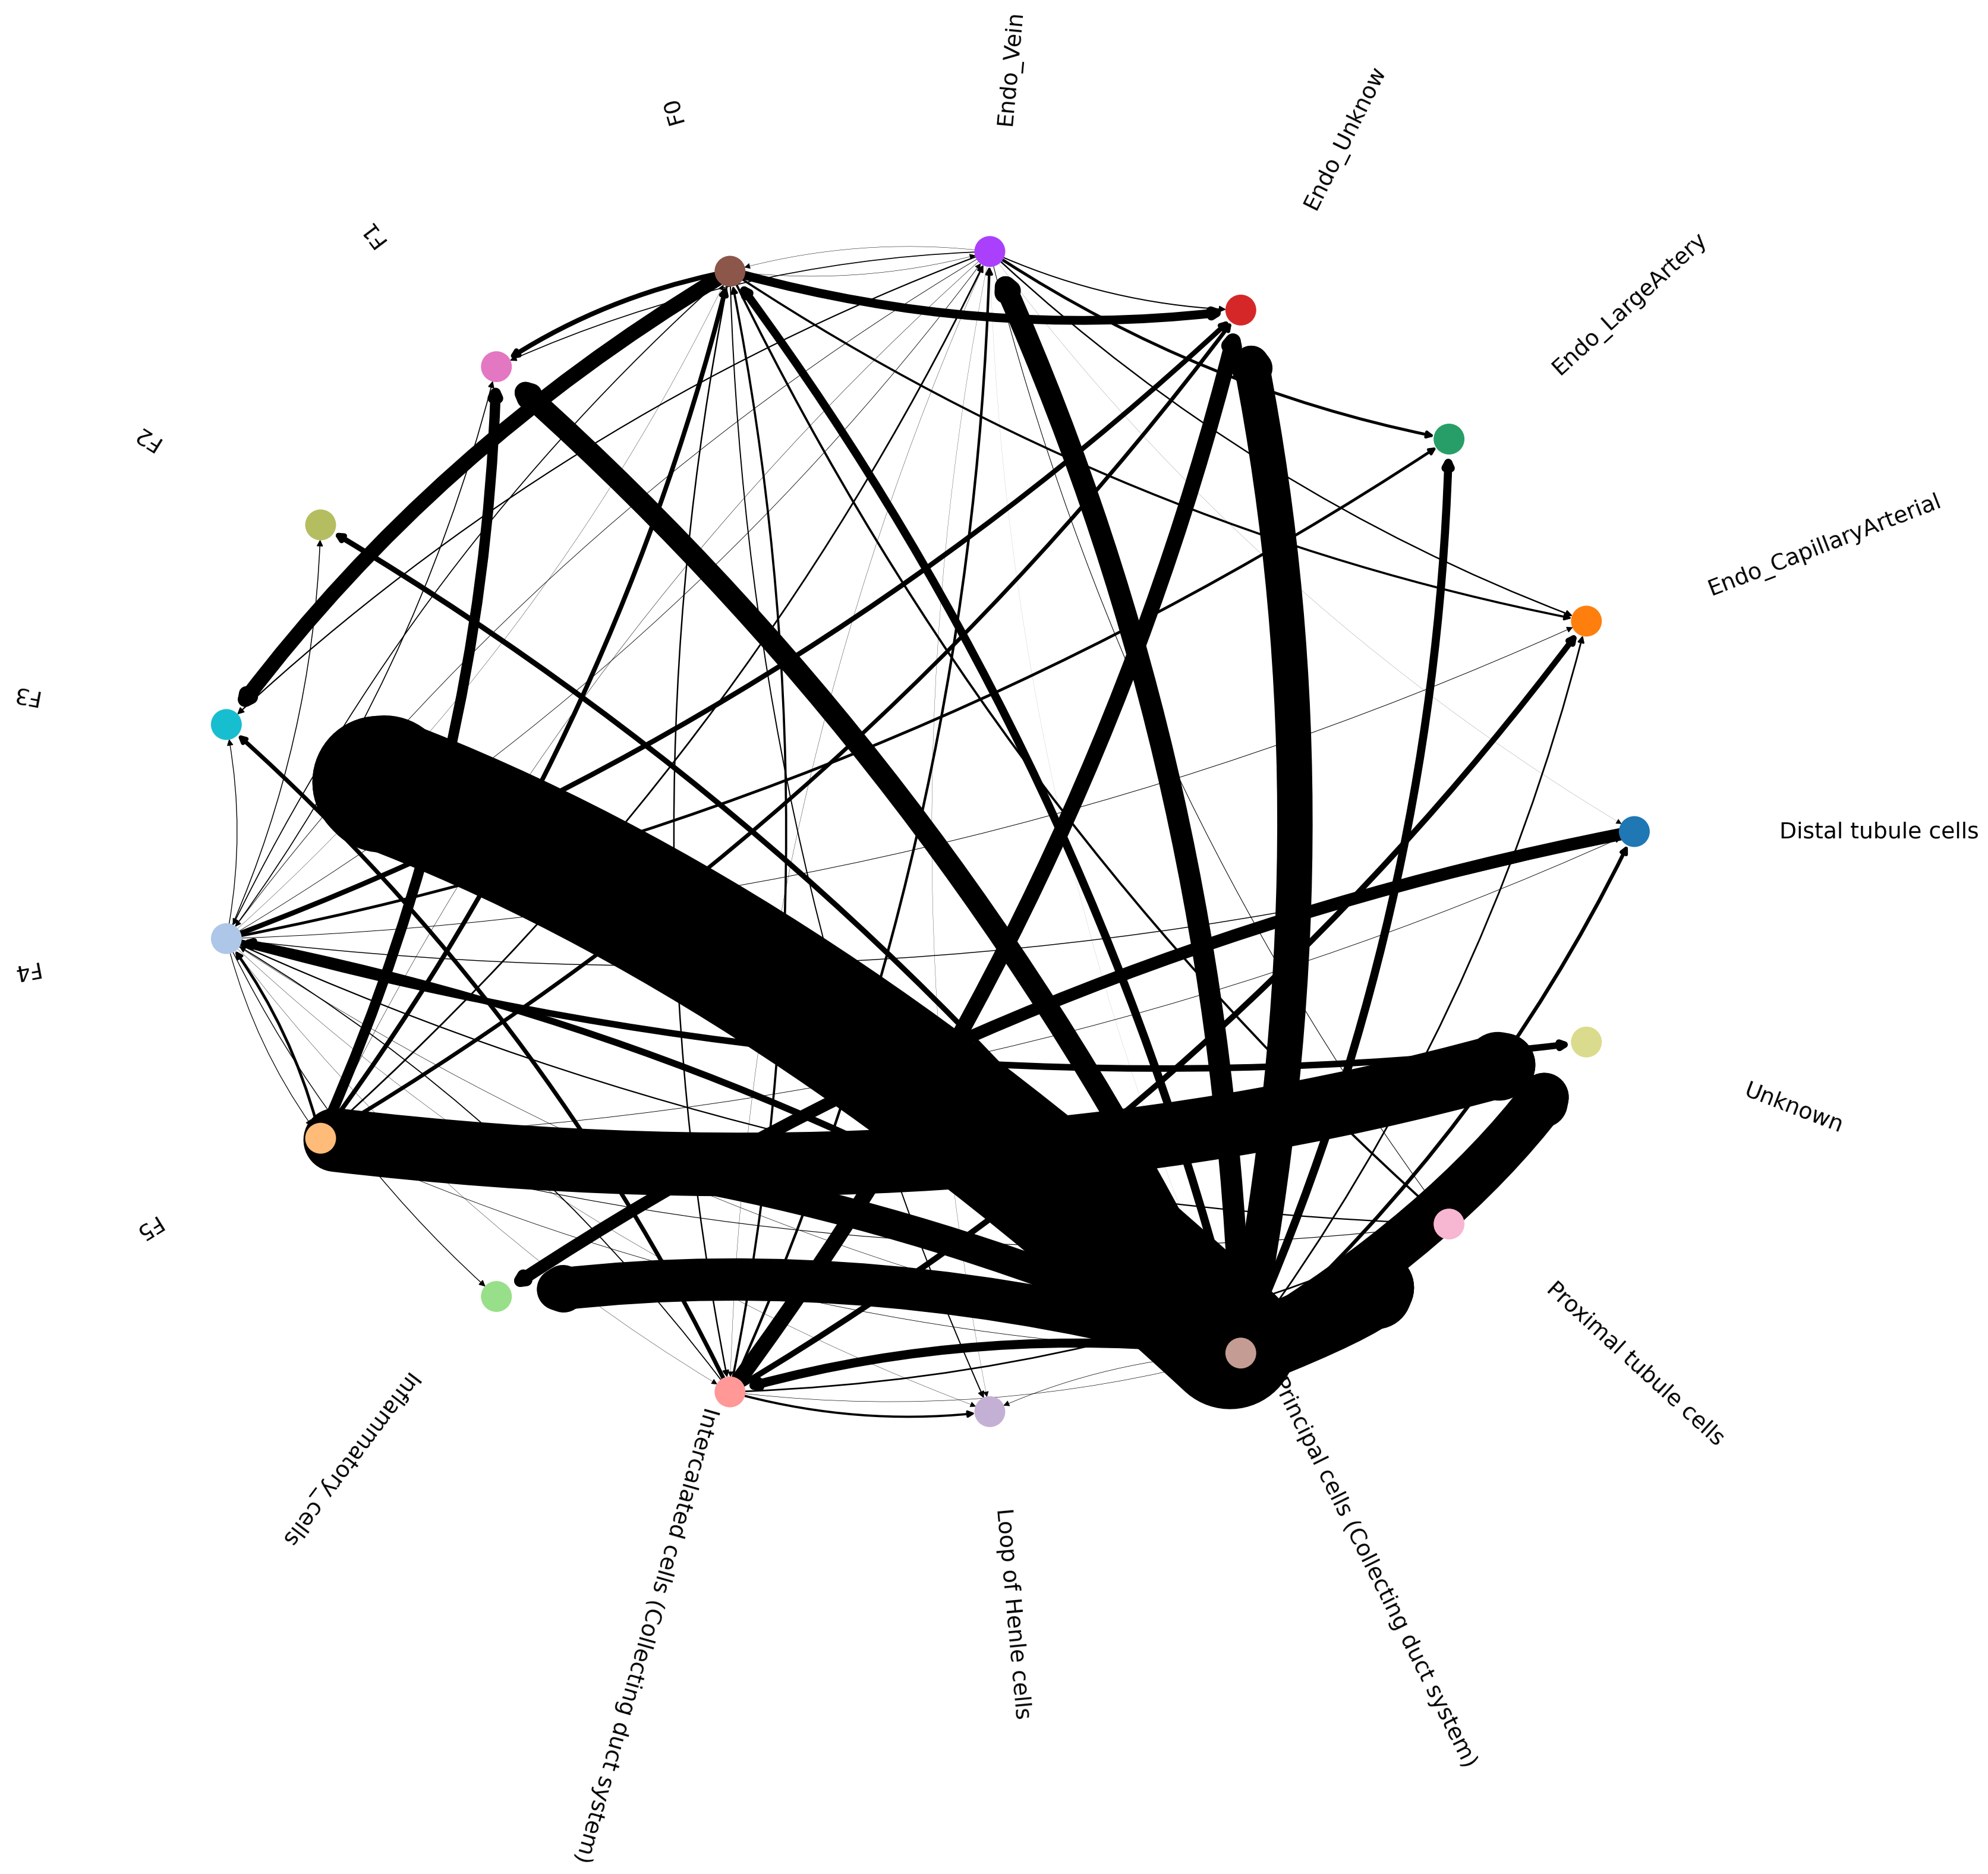

In [55]:
%%capture_img --path 'ncem.eps'
type_coupling= ncem_ip.type_coupling_analysis_circular(
    edge_width_scale=0.1, edge_attr='magnitude',figsize=(21,20), text_space=1.28, de_genes_threshold=200)


In [51]:
pwd

'/home/jovyan/brain'

In [16]:
import inspect


def example_function(arg1, arg2):
    
    result = arg1 + arg2
    return result


source_code = inspect.getsource(ncem_ip.type_coupling_analysis_circular)


print(source_code)

    def type_coupling_analysis_circular(
        self,
        edge_attr: str,
        edge_width_scale: float = 3.0,
        fontsize: Optional[int] = None,
        figsize: Tuple[float, float] = (9, 8),
        de_genes_threshold: float = 0,
        # magnitude_threshold: Optional[float] = None,
        save: Optional[str] = None,
        suffix: str = "_type_coupling_analysis_circular.pdf",
        show: bool = True,
        undefined_types: Optional[List[str]] = None,
        text_space: float = 1.15,
    ):
        coeff = self.fold_change * self.is_sign
        coeff_df = pd.DataFrame(np.sqrt(np.sum(coeff**2, axis=-1)), columns=self.cell_names, index=self.cell_names)
        network_coeff_df = (
            pd.DataFrame(coeff_df.unstack()).reset_index().rename(columns={"level_0": "sender", "level_1": "receiver"})
        )
        network_coeff_df = network_coeff_df[network_coeff_df["receiver"] != network_coeff_df["sender"]]

        sig_df = pd.DataFrame(np.sum(self.is_sign, axi

In [48]:
import jupyter_capture_output

Jupyter Capture Output v0.0.11
